In [21]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import missingno as msno


### ✅ Step 1: Import Libraries
We import required libraries for data processing, visualization, preprocessing, and feature selection.


In [22]:
# 📌 2. Load Dataset
df = pd.read_csv("D:/vs code/sem 5/RealEsatePredictor/datasets/real_estate_data .csv")  # Ensure correct path
df.head()
print("✅ Dataset loaded:", df.shape)


✅ Dataset loaded: (14528, 9)


### ✅ Step 2: Load Dataset
We load the dataset and preview the first few rows.


In [23]:
# 📌 3. Explore Data
print("\n🔎 Basic Info:")
df.info()

print("\n📊 Statistical Summary:")
display(df.describe())


print("\n🔑 Unique Values in Categorical Columns:")
print(df.select_dtypes(include='object').nunique())



🔎 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Description     14528 non-null  object 
 7   Baths           14528 non-null  int64  
 8   Balcony         14528 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1021.6+ KB

📊 Statistical Summary:


,Total_Area,Price_per_SQFT,Baths
count,14528.000000,14528.000000,14528.000000
mean,1297.916988,11719.456222,2.751239
std,1245.694305,49036.068632,0.898243
min,70.000000,0.000000,1.000000
25%,650.000000,4480.000000,2.000000
50%,1000.000000,6050.000000,3.000000
75%,1439.000000,9312.500000,3.000000
max,35000.000000,999000.000000,6.000000



🔑 Unique Values in Categorical Columns:
Name               9998
Property Title     6507
Price               891
Location           7050
Description       14490
Balcony               2
dtype: int64


### ✅ Step 3: Explore Data
We review dataset info, stats, missing value patterns, and categorical column uniqueness.


In [24]:
# 📌 4. Handle Missing Values
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# Fill numerical NaNs with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical NaNs with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


### ✅ Step 4: Handle Missing Values
We impute missing values using median (numeric) and mode (categorical) strategies.


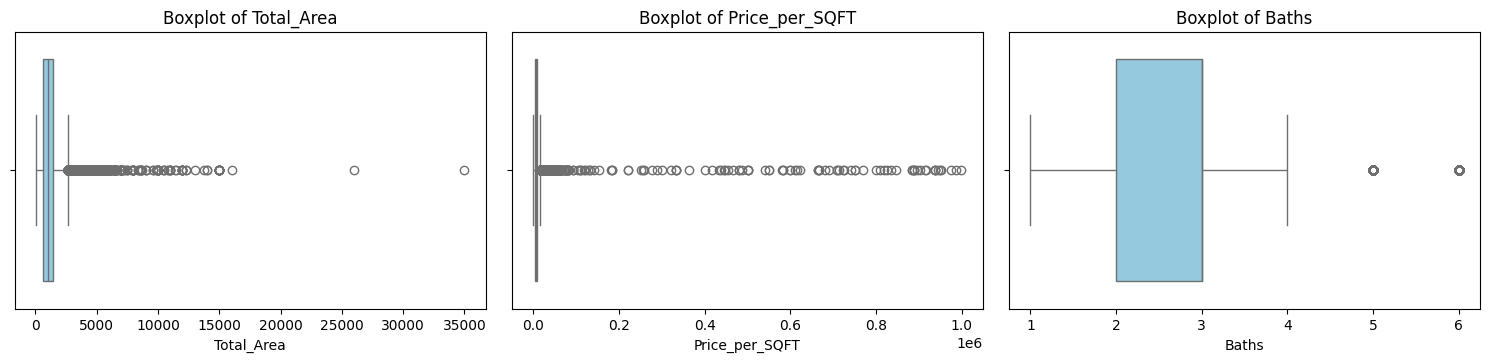

In [25]:
# 📌 5. Outlier Visualization
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


### ✅ Step 5: Outlier Visualization
We visualize numerical columns with boxplots to identify potential outliers.


In [26]:
# # 📌 6. Remove Outliers (IQR with less strict filtering)
# for col in num_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     df = df[~((df[col] < (Q1 - 2.0 * IQR)) | (df[col] > (Q3 + 2.0 * IQR)))]


<!-- ### ✅ Step 6: Remove Outliers
We remove outliers using the IQR method with a **2.0 multiplier** to avoid excessive row removal. -->


In [27]:
df

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes
...,...,...,...,...,...,...,...,...,...
14523,"Krishna Park Extension, Tilak Nagar,New Delhi","2 BHK Flat for sale in Tilak Nagar, New Delhi",₹40.0 L,"Krishna Park Extension, Tilak Nagar,New Delhi",1053,3800.0,Looking for a good 2 BHK Apartment in Tilak Na...,3,Yes
14524,"Rawta, Jaffarpur Kalan,New Delhi",1 BHK Independent House for sale in Jaffarpur ...,₹14.0 L,"Rawta, Jaffarpur Kalan,New Delhi",472,2970.0,1 BHK Independent House for sale in Jaffarpur ...,2,Yes
14525,"Rani Garden, Geeta Colony,New Delhi","1 BHK Flat for sale in Geeta Colony, New Delhi",₹30.0 L,"Rani Garden, Geeta Colony,New Delhi",378,7940.0,"Property for sale in Geeta Colony, Delhi. This...",1,Yes
14526,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...","3 BHK Flat for sale in Sector 16 Rohini, New D...",₹60.0 L,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...",700,8570.0,Check out this 3 BHK Apartment for sale in Roh...,2,Yes


In [28]:
# 📌 7. Scale Numeric Columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### ✅ Step 7: Scale Numeric Columns
Scales numeric features to standard normal distribution (mean=0, variance=1).

In [29]:
# Encode 'balcony' column to 0 and 1
df['balcony_encoded'] = df['Balcony'].map({'Yes': 1, 'No': 0})

print(df[['Balcony', 'balcony_encoded']].head())

  Balcony  balcony_encoded
0     Yes                1
1     Yes                1
2      No                0
3     Yes                1
4     Yes                1


Encode categorical column to numeric

In [30]:
# 📌 8. Split Data
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### ✅ Step 8: Train-Test Split
Separates features (X) and target (y) into training (80%) and testing (20%) sets.


In [31]:
def parse_price(price_str):
    if pd.isna(price_str):
        return np.nan
    price_str = str(price_str).replace('₹', '').replace(',', '').strip()
    try:
        if 'Cr' in price_str:
            return float(price_str.replace('Cr', '').strip()) * 1e7  # in Rupees
        elif 'L' in price_str:
            return float(price_str.replace('L', '').strip()) * 1e5  # in Rupees
        return float(price_str)  # already in Rupees
    except ValueError:
        return np.nan

# Convert to Rupees → then Lacs → round to 2 decimals
df['Price_in_Lacs'] = (df['Price'].apply(parse_price) / 1e5).round(2)

# Show first 10 rows
print(df['Price_in_Lacs'].head(10))


0    199.00
1    225.00
2    100.00
3    333.00
4     48.00
5     40.00
6     60.00
7     72.35
8     42.00
9     30.00
Name: Price_in_Lacs, dtype: float64


Convert price and add as a new numeric column

In [32]:
# 📌 9. Save Cleaned Dataset
df_clean = df

### ✅ Step 9: Save Cleaned Dataset
Exports the cleaned dataset for further use.

In [33]:
df_clean

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,balcony_encoded,Price_in_Lacs
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",1.031655,-0.081972,Best 4 BHK Apartment for modern-day lifestyle ...,1.390274,Yes,1,199.0
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",4.577591,-0.173541,Looking for a 10 BHK Independent House for sal...,3.616919,Yes,1,225.0
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",0.017728,-0.084419,"Property for sale in Tambaram, Chennai. This 3...",0.276951,No,0,100.0
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",2.369911,-0.079117,Entire Building for sale with 7 units of singl...,2.503596,Yes,1,333.0
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",-0.271277,-0.137036,"Property for sale in Avadi, Chennai. This 2 BH...",0.276951,Yes,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...
14523,"Krishna Park Extension, Tilak Nagar,New Delhi","2 BHK Flat for sale in Tilak Nagar, New Delhi",₹40.0 L,"Krishna Park Extension, Tilak Nagar,New Delhi",-0.196618,-0.161508,Looking for a good 2 BHK Apartment in Tilak Na...,0.276951,Yes,1,40.0
14524,"Rawta, Jaffarpur Kalan,New Delhi",1 BHK Independent House for sale in Jaffarpur ...,₹14.0 L,"Rawta, Jaffarpur Kalan,New Delhi",-0.663040,-0.178435,1 BHK Independent House for sale in Jaffarpur ...,-0.836371,Yes,1,14.0
14525,"Rani Garden, Geeta Colony,New Delhi","1 BHK Flat for sale in Geeta Colony, New Delhi",₹30.0 L,"Rani Garden, Geeta Colony,New Delhi",-0.738503,-0.077078,"Property for sale in Geeta Colony, Delhi. This...",-1.949694,Yes,1,30.0
14526,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...","3 BHK Flat for sale in Sector 16 Rohini, New D...",₹60.0 L,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...",-0.480003,-0.064230,Check out this 3 BHK Apartment for sale in Roh...,-0.836371,Yes,1,60.0


In [34]:
# 📌 10. Feature Importance & Selection (numeric only)

from sklearn.ensemble import RandomForestRegressor

# Drop rows with NaN in 'Price_numeric'
df_clean = df.dropna(subset=['Price_in_Lacs'])

# Use only numeric columns for feature importance
num_cols = df_clean.select_dtypes(include=np.number).columns
feature_cols = [col for col in num_cols if col != 'Price_in_Lacs']

X_num = df_clean[feature_cols]
y = df_clean['Price_in_Lacs']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_num, y)
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_num.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Add feature importance as a new column (NaN for non-feature columns)
df['feature_importance'] = np.nan
for col, imp in zip(feature_importance_df['Feature'], feature_importance_df['Importance']):
    df.loc[:, 'feature_importance'] = df['feature_importance'].combine_first(df[col].map(lambda x: imp))

# Select top features (e.g., importance >= 0.02)
threshold = 0.02
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()
df_selected = df[selected_features + ['Price', 'feature_importance']]

print(f"✅ Feature importance added. Selected {len(selected_features)} features.")
df_selected.head()


✅ Feature importance added. Selected 3 features.


,Price_per_SQFT,Total_Area,Baths,Price,feature_importance
0,-0.081972,1.031655,1.390274,₹1.99 Cr,0.572351
1,-0.173541,4.577591,3.616919,₹2.25 Cr,0.572351
2,-0.084419,0.017728,0.276951,₹1.0 Cr,0.572351
3,-0.079117,2.369911,2.503596,₹3.33 Cr,0.572351
4,-0.137036,-0.271277,0.276951,₹48.0 L,0.572351


### ✅ Step 10: Feature Importance & Selection
Random Forest feature importances are appended as a new column.  
Top features are selected, but all original columns remain unchanged.

In [35]:
# Combine cleaned and selected datasets into one DataFrame
combined_df = df_clean.copy()

# Add selected features from df_selected (excluding duplicates and 'feature_importance')
for col in df_selected.columns:
    if col not in combined_df.columns and col != 'feature_importance':
        combined_df[col] = df_selected[col]

# Optionally, add feature_importance column
if 'feature_importance' in df_selected.columns:
    combined_df['feature_importance'] = df_selected['feature_importance']

# Save the combined dataset
combined_df.to_csv("D:/vs code/sem 5/RealEsatePredictor/preprocessed_data/bangalore/real_estate_data_bangalore.csv", index=False)

print("✅ Combined cleaned and selected dataset saved as 'real_estate_data_bangalore.csv'")

✅ Combined cleaned and selected dataset saved as 'real_estate_data_bangalore.csv'


<Axes: >

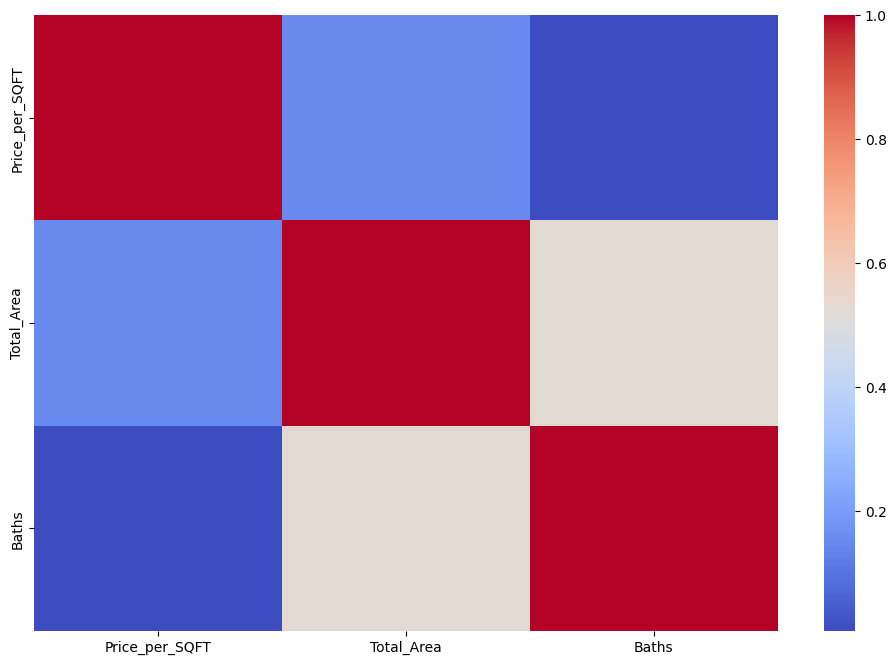

In [36]:
# 📌 11. Correlation Matrix of Selected Features

# Drop non-numeric columns before correlation
corr_selected = df_selected.drop(['feature_importance', 'Price'], axis=1).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_selected, annot=False, cmap='coolwarm')

### ✅ Step 11: Correlation Matrix of Selected Features
Displays the correlation matrix for the selected top features.